In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [2]:
new_data = pd.read_csv('Att2CleanData.csv')

In [3]:
x_new_data = new_data.drop(['GoodLoan'], axis=1)
y_new_data = new_data['GoodLoan']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_new_data, y_new_data, test_size=0.33, random_state=42)

In [5]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_sm, y_sm = sm.fit_sample(X_train, y_train)
#unique_rsm, counts_rsm = np.unique(y_sm, return_counts=True)
#dict(zip(unique_rsm, counts_rsm))

/home/pizzle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_sm, y_sm)

#print(clf.feature_importances_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
feature_imp = clf.feature_importances_

In [8]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_new_data.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

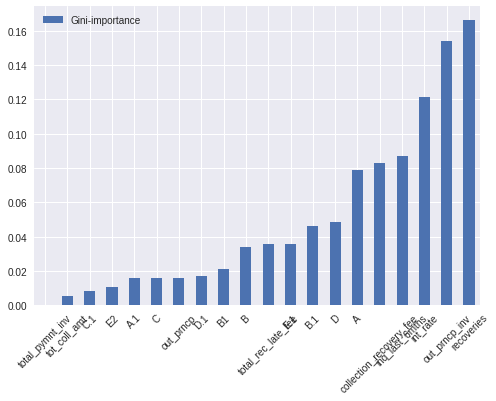

In [9]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance')[-20:].plot(kind='bar', rot=45)

In [7]:
y_true, y_pred = y_test, clf.predict(X_test)

In [11]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        0.0       0.20      0.56      0.30     18839
        1.0       0.96      0.83      0.89    250681

avg / total       0.91      0.81      0.85    269520



In [ ]:
scores = []

for val in range(2, 10):
    clf01 = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf01, X_train, y_train, cv=10)
    scores.append(validated)

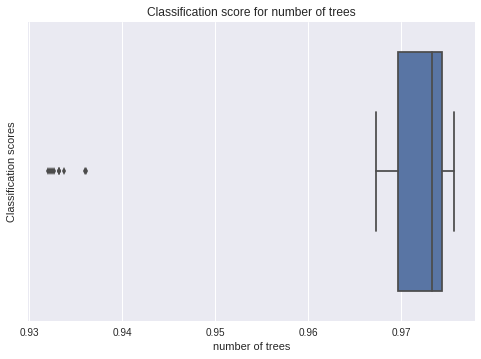

In [18]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

In [ ]:
print(scores)

In [8]:
y_score = clf01.fit(x_sm, y_sm).decision_function(X_test)

NameError: name 'clf01' is not defined

In [29]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: Can only tuple-index with a MultiIndex

In [8]:
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(n_estimators = 2, n_jobs=2)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


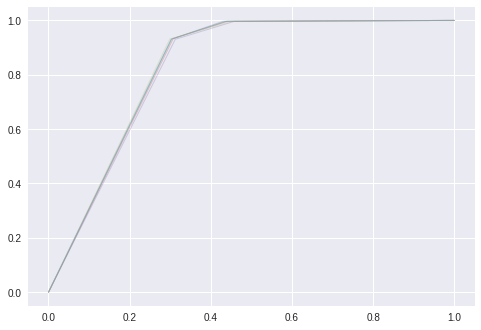

In [9]:
i = 0
for train, test in cv.split(x_sm, y_sm):
    probas_ = classifier.fit(x_sm, y_sm).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

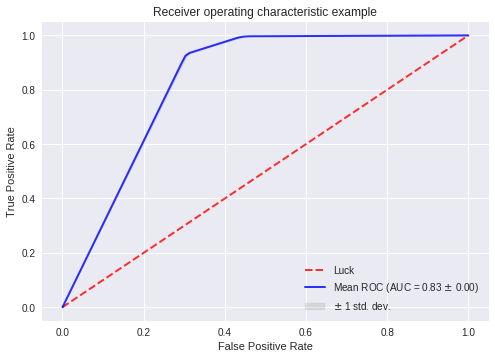

In [10]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()